DATA IMPORTATION, CLEANING AND TRANSFORMATION
Installing necessary packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mat
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline



In [2]:
#Import the dataset
#Dataset "wn_bothhouses_2.csv" is about percencentage female representation in government from 1945-2021
data = pd.read_csv("wn_bothhouses_2.csv")
#view the imported dataset
data


,country,1945,1946,1947,1948,1949,1950,1951,1952,1953,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,27.40,27.40,27.40,27.40,27.7,27.8,27.9,27.2,27.2,27.20
1,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,34.10,33.50,32.80,32.20,31.6,30.9,30.4,30.0,29.6,29.60
2,Albania,3.66,6.46,8.81,10.80,12.50,14.10,13.50,12.90,12.40,...,15.90,15.70,18.80,21.80,24.8,27.9,28.6,29.5,29.5,35.70
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,50.00,47.60,44.30,39.30,41.1,42.9,44.6,46.4,46.4,46.40
4,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,17.50,19.20,20.80,22.50,29.4,36.3,43.1,50.0,50.0,50.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,Uganda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15.20,14.30,13.40,12.70,12.1,17.0,24.0,34.9,34.9,33.80
180,Ukraine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.44,10.50,11.70,13.40,15.2,17.0,18.8,20.5,20.8,20.30
181,St. Vincent and the Grenadines,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13.80,13.50,13.30,13.00,13.0,13.0,13.0,13.0,18.2,18.20
182,Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.28,6.48,7.66,8.84,10.0,10.0,10.0,10.0,10.0,7.84


#The dataset shows alot of missing data (NaN)
#We do further data parsing or exploration


In [11]:
#To see the data types
data.info()

#To see the unique information/data points
# data.unique()
# data['country'].unique()

# #To see the number of columns and rows
# data.shape()
data.columns

# #Check for missing values
data.isnull().sum()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 78 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  184 non-null    object 
 1   1945     17 non-null     float64
 2   1946     34 non-null     float64
 3   1947     40 non-null     float64
 4   1948     48 non-null     float64
 5   1949     51 non-null     float64
 6   1950     53 non-null     float64
 7   1951     56 non-null     float64
 8   1952     59 non-null     float64
 9   1953     60 non-null     float64
 10  1954     62 non-null     float64
 11  1955     64 non-null     float64
 12  1956     64 non-null     float64
 13  1957     66 non-null     float64
 14  1958     67 non-null     float64
 15  1959     70 non-null     float64
 16  1960     78 non-null     float64
 17  1961     82 non-null     float64
 18  1962     85 non-null     float64
 19  1963     90 non-null     float64
 20  1964     94 non-null     float64
 21  1965     99 non-

country      0
1945       167
1946       150
1947       144
1948       136
          ... 
2017         9
2018         9
2019         1
2020         2
2021         2
Length: 78, dtype: int64

Handling missing data;
Missing data can result from sampling errors, or can actually be missing information.
There are very many missing data points from 1945 to about the 1970's. This could be explained by the fact that most countries 
(especially in Africa) only got independence in 1960's, therefore female governance only started later(about 1970's).
Therefore, the missing data can be replaced with 0 (zero) to capture the reality of there was no female representation in the years where data is missing.


In [12]:
#Replacing missing data with zero
data_new = data.fillna(0)
data_new


,country,1945,1946,1947,1948,1949,1950,1951,1952,1953,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Afghanistan,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,27.40,27.40,27.40,27.40,27.7,27.8,27.9,27.2,27.2,27.20
1,Angola,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,34.10,33.50,32.80,32.20,31.6,30.9,30.4,30.0,29.6,29.60
2,Albania,3.66,6.46,8.81,10.80,12.50,14.10,13.50,12.90,12.40,...,15.90,15.70,18.80,21.80,24.8,27.9,28.6,29.5,29.5,35.70
3,Andorra,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,50.00,47.60,44.30,39.30,41.1,42.9,44.6,46.4,46.4,46.40
4,United Arab Emirates,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,17.50,19.20,20.80,22.50,29.4,36.3,43.1,50.0,50.0,50.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,Uganda,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,15.20,14.30,13.40,12.70,12.1,17.0,24.0,34.9,34.9,33.80
180,Ukraine,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,9.44,10.50,11.70,13.40,15.2,17.0,18.8,20.5,20.8,20.30
181,St. Vincent and the Grenadines,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,13.80,13.50,13.30,13.00,13.0,13.0,13.0,13.0,18.2,18.20
182,Samoa,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,5.28,6.48,7.66,8.84,10.0,10.0,10.0,10.0,10.0,7.84


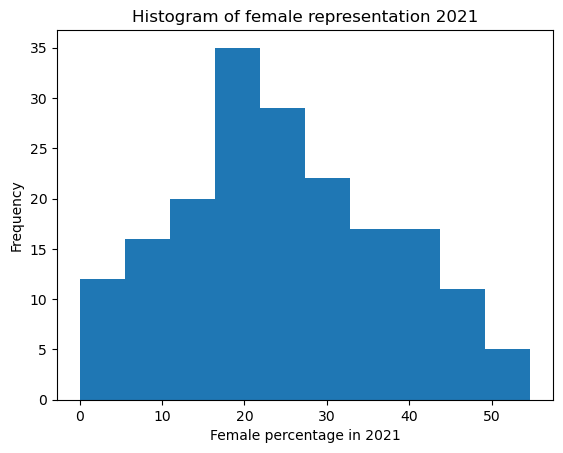

In [13]:
#Looking at the distribution of data also informs us about whether there are some redundancies
#Bar plots for discrete data
#Histograms for continous data
# histogram of female representation in 2021
import matplotlib.pyplot as plt
plt.hist(data_new['2021'])

# Add a label to the x axis
plt.xlabel('Female percentage in 2021')

#Add a label to the y axis
plt.ylabel("Frequency")

#Add a title
plt.title("Histogram of female representation 2021")

# Show the plot
plt.show()

The data in 2021 looks normally distributed

Checking for outliers

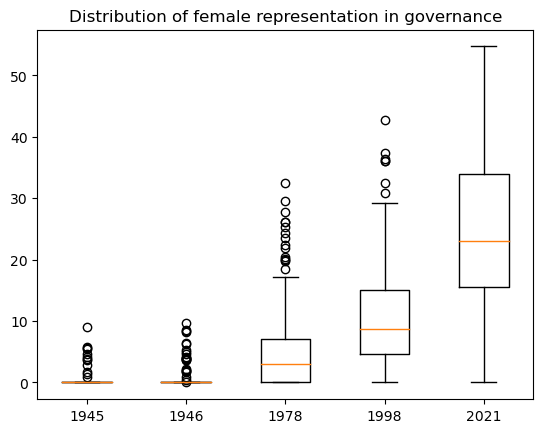

In [14]:
#Looking at all the years using box plots
# Create a box plot of the female representation in different years
plt.boxplot([data_new['1945'], data_new['1946'], data_new['1978'], data_new['1998'], data_new['2021']])

# Add labels to the x axis
plt.xticks([1, 2, 3, 4, 5], ['1945', '1946', '1978', '1998', '2021'])

# Adding title
plt.title("Distribution of female representation in governance")

# Show the plot
plt.show()

There are more outlier points in the 1940's, and the number reduces in the 1980's
to 1990's. These outliers could be as a result of the very low representation in
some countries vs others. E.g. Less representation in Africa and Asia during colonial governance.

<function matplotlib.pyplot.show(close=None, block=None)>

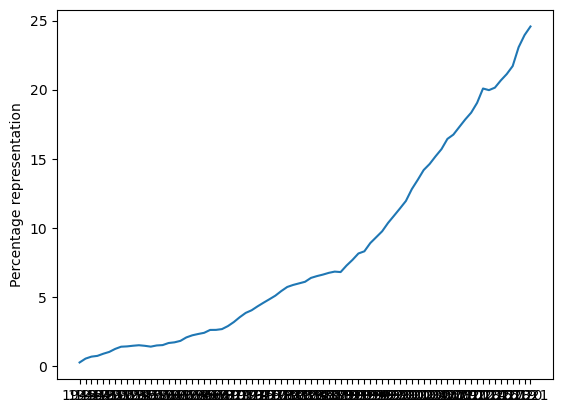

In [15]:
#We could further explore the representation of females over the years
# Plot the average female representation for each year
if 'country' in data_new.columns:
    Female_govt_rep = data_new.mean(numeric_only=True)
else:
    Female_govt_rep = data_new.mean()

plt.plot(Female_govt_rep, label='Female Govt Representation 1945-2021')

# Add a label to the x axis
plt.xticks(range(len(Female_govt_rep)), Female_govt_rep.index)

# Add a label to the y axis
plt.ylabel('Percentage representation')

#Show the plot
plt.show

There's clearly a sharp increase in the female representation over the years

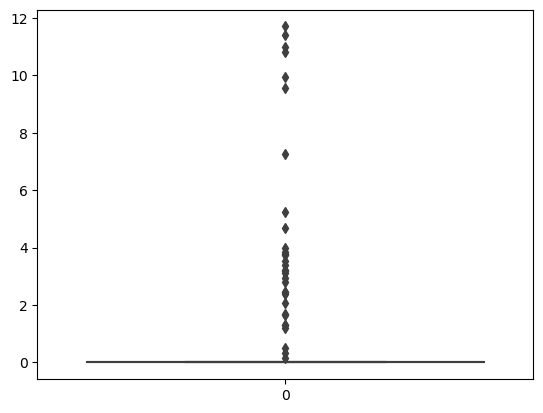

In [16]:
#We can also use the library seaborn to check for outliers
#Checking for outliers in 1948
Outliers_1948 = sns.boxplot(data_new['1948'])

Handling outliers
Outliers can also be identified using;
1. The Inter-Quartile Range (IQR) method
They can be handled by;
1. Setting limits within the IQR and visualising the resulting boxplots
2. Deleting the problematic columns/rows


In [17]:
# Create a function to find outliers in the year 1948 using IQR
Q1 = np.percentile(data_new['1948'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(data_new['1948'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
# Above Upper bound
upper = data_new['1948'] >= (Q3+1.5*IQR)
 
print("Upper bound:",upper)
print(np.where(upper))
 
# Below Lower bound
lower = data_new['1948'] <= (Q1-1.5*IQR)
print("Lower bound:", lower)
print(np.where(lower))
print("Old Shape: ", data_new.shape)

Upper bound: 0      True
1      True
2      True
3      True
4      True
       ... 
179    True
180    True
181    True
182    True
183    True
Name: 1948, Length: 184, dtype: bool
(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146

We can then remove the upper bound (values higher than the highest boundary) and the lower bound (values less than the lowest boundary). Removing outliers has an impact on the prediction model output.

In [18]:
data_new.drop(upper[0], inplace = True)
data_new.drop(lower[0], inplace = True)
 
print("New Shape: ", data_new.shape)

KeyError: '[True] not found in axis'

Generating descriptive statistics (central tendencies) also informs us about the dispersal of data.

In [19]:
#To generate the descriptive stats of the entire dataset
data_new.describe()

#Just get descriptive stats of particular variables e.g. 2021
data_new[["1945", "2021"]].describe()

,1945,2021
count,184.000000,184.000000
mean,0.265543,24.567880
std,1.151661,12.696965
min,0.000000,0.000000
25%,0.000000,15.600000
50%,0.000000,23.050000
75%,0.000000,33.900000
max,9.000000,54.700000


In [20]:
# To generate the mean for each country across the years
data_new.groupby("country").mean(numeric_only=True)



,1945,1946,1947,1948,1949,1950,1951,1952,1953,1954,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,27.40,27.4,27.40,27.40,27.70,27.80,27.90,27.20,27.20,27.20
Albania,3.66,6.46,8.81,10.80,12.50,14.10,13.50,12.90,12.40,11.90,...,15.90,15.7,18.80,21.80,24.80,27.90,28.60,29.50,29.50,35.70
Algeria,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,25.80,23.8,19.70,6.94,21.30,25.80,6.82,21.60,21.20,7.48
Andorra,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,50.00,47.6,44.30,39.30,41.10,42.90,44.60,46.40,46.40,46.40
Angola,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,34.10,33.5,32.80,32.20,31.60,30.90,30.40,30.00,29.60,29.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tuvalu,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,2.67,4.0,5.33,6.67,6.56,6.45,6.35,6.25,6.25,6.25
Uganda,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,15.20,14.3,13.40,12.70,12.10,17.00,24.00,34.90,34.90,33.80
Ukraine,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,9.44,10.5,11.70,13.40,15.20,17.00,18.80,20.50,20.80,20.30


In [15]:
#Generate the median of each country across the years
data_new.groupby("country").median(numeric_only=True)

,1945,1946,1947,1948,1949,1950,1951,1952,1953,1954,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,27.40,27.4,27.40,27.40,27.70,27.80,27.90,27.20,27.20,27.20
Albania,3.66,6.46,8.81,10.80,12.50,14.10,13.50,12.90,12.40,11.90,...,15.90,15.7,18.80,21.80,24.80,27.90,28.60,29.50,29.50,35.70
Algeria,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,25.80,23.8,19.70,6.94,21.30,25.80,6.82,21.60,21.20,7.48
Andorra,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,50.00,47.6,44.30,39.30,41.10,42.90,44.60,46.40,46.40,46.40
Angola,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,34.10,33.5,32.80,32.20,31.60,30.90,30.40,30.00,29.60,29.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tuvalu,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,2.67,4.0,5.33,6.67,6.56,6.45,6.35,6.25,6.25,6.25
Uganda,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,15.20,14.3,13.40,12.70,12.10,17.00,24.00,34.90,34.90,33.80
Ukraine,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,9.44,10.5,11.70,13.40,15.20,17.00,18.80,20.50,20.80,20.30


<function matplotlib.pyplot.show(close=None, block=None)>

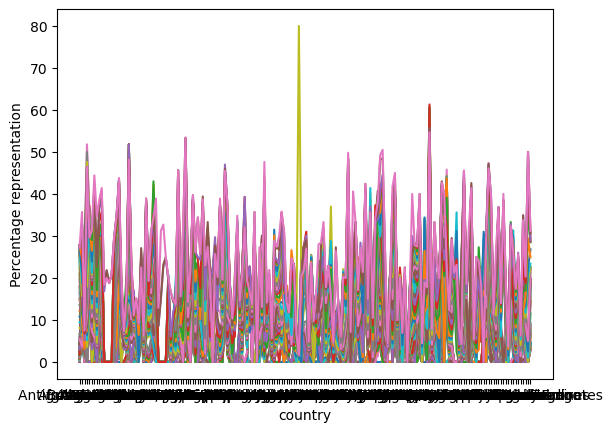

In [21]:
#To generate a plot of the means per country
# Plot the average female representation for each year
if 'country' in data_new.columns:
    Mean = data_new.groupby("country").mean(numeric_only=True)
else:
    Mean = data_new.mean()

plt.plot(Mean, label='Average female representation across countries')


# Add a label to the x axis
plt.xticks(range(len(Mean)), Mean.index)

# Add a label to the y and x axis
plt.ylabel('Percentage representation')
plt.xlabel('country')

#Print the plot
plt.show


The resulting plot is too crowded, so it's best to split the data
For instance showing only a few countries ofver the years
Hypothesis: Switzerland and Uganda have varying female representation over the years
So first filter the dataset to focus on only that information
